In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from flaml import AutoML
from sklearn.model_selection import train_test_split
import pickle



In [2]:
data = pd.read_csv("./data/data_sepsis.csv")
print(data)

            ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1    ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2    ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3    ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4    ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 11 columns]


In [3]:
data["Sepssis"] = data["Sepssis"].map({"Negative": 0, "Positive": 1})
print(data)

            ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance  Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50          0        1
1    ICU200011    1   85  66  29    0  26.6  0.351   31          0        0
2    ICU200012    8  183  64   0    0  23.3  0.672   32          1        1
3    ICU200013    1   89  66  23   94  28.1  0.167   21          1        0
4    ICU200014    0  137  40  35  168  43.1  2.288   33          1        1
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...      ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0        0
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1        1
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1        0
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0        0
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1        1

[599 rows x 11 columns]


In [12]:
y = data['Sepssis']
x = data.drop(['ID', 'Sepssis'], axis=1)

print(y)
print(x)

0      1
1      0
2      1
3      0
4      1
      ..
594    0
595    1
596    0
597    0
598    1
Name: Sepssis, Length: 599, dtype: int64
     PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0      6  148  72  35    0  33.6  0.627   50          0
1      1   85  66  29    0  26.6  0.351   31          0
2      8  183  64   0    0  23.3  0.672   32          1
3      1   89  66  23   94  28.1  0.167   21          1
4      0  137  40  35  168  43.1  2.288   33          1
..   ...  ...  ..  ..  ...   ...    ...  ...        ...
594    6  123  72  45  230  33.6  0.733   34          0
595    0  188  82  14  185  32.0  0.682   22          1
596    0   67  76   0    0  45.3  0.194   46          1
597    1   89  24  19   25  27.8  0.559   21          0
598    1  173  74   0    0  36.8  0.088   38          1

[599 rows x 9 columns]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [14]:
print("Taille x_train :", len(x_train), "Taille x_test",len(x_test))
print("Taille y_train :", len(y_train), "taille y_test", len(y_test))

Taille x_train : 479 Taille x_test 120
Taille y_train : 479 taille y_test 120


In [31]:
print(y_test)

442    0
286    0
379    0
522    0
200    0
      ..
5      0
223    0
159    1
38     1
192    1
Name: Sepssis, Length: 120, dtype: int64


In [ ]:
settings = {
"time_budget": 600,  # total running time in seconds
"metric": 'accuracy', 
"task": 'classification',  # task type
"log_file_name": 'modelv1.log',  # flaml log file
"seed": 1,    # random seed
}


automl = AutoML()
automl.fit(x_train, y_train,**settings)


In [81]:
from sklearn.metrics import accuracy_score

y_pred = automl.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7


In [73]:
print("Meilleur modèle :", automl.model)
print("Paramètres :", automl.best_config)


Meilleur modèle : <flaml.automl.model.ExtraTreesEstimator object at 0x000001C78FA60250>
Paramètres : {'n_estimators': 59, 'max_features': 0.7186643615193348, 'max_leaves': 39, 'criterion': 'gini'}


In [74]:

# Sauvegarder le modèle
with open("./trained_models/best_model.pkl", "wb") as file:
    pickle.dump(automl.model, file)



In [75]:
# Charger le modèle
with open("./trained_models/best_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [76]:
'''compute predictions of testing dataset''' 
y_pred = automl.predict(x_test)
y_pred_proba = automl.predict_proba(x_test)
# print(y_pred_proba)


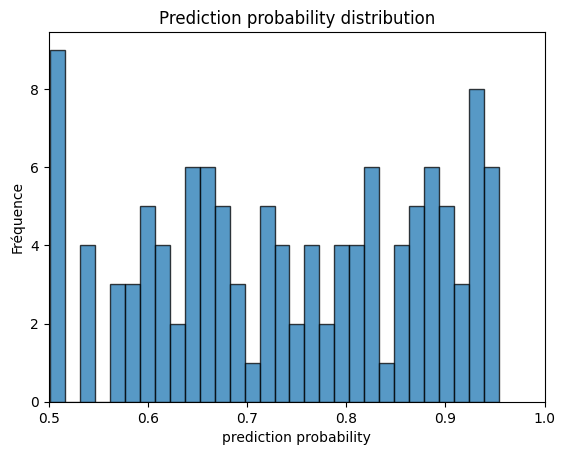

In [77]:
# Prediction probability histogramme
choised_proba = []
for dual_prob in y_pred_proba:
    if dual_prob[0] >= dual_prob[1]:
        choised_proba.append(dual_prob[0])
    else:
        choised_proba.append(dual_prob[1])

plt.hist(choised_proba, bins=30, edgecolor='black', alpha=0.75)
plt.xlim(0.5,1)
plt.xlabel('prediction probability')
plt.ylabel('Fréquence')
plt.title('Prediction probability distribution')

# Affichez l'histogramme
plt.show()


In [78]:
proba = automl.predict_proba(x_test)[:,1]
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', proba, y_test))

accuracy = 0.7
roc_auc = 0.7341507177033493
log_loss = 0.5813062864921238


In [79]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 479, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 479, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 10, 'learning_rate': 0.24265799106484617, 'log_max_bin': 7, 'colsample_bytree': 0.9350250030443705, 'reg_alpha': 0.0016817704116337995, 'reg_lambda': 0.2602716047300951}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 10, 'learning_rate': 0.24265799106484617, 'log_max_bin': 7, 'colsample_bytree

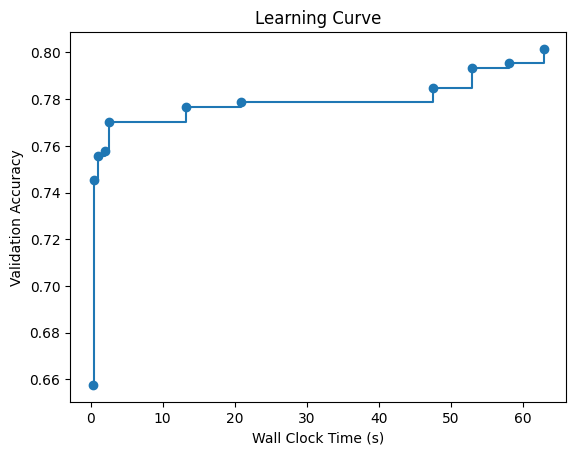

In [80]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()